#MINI PROJECT ON HEART DISEASE PREDICTION 

our "goal" predict the presence of heart disease in the patient **bold text**

# Importing Library for Operations 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline



# Import and read our DataSet

In [ ]:
df = pd.read_csv('/content/heart.csv')
#print first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0.0,2.3,0.0,0,1,1
1,37,1,2,130,250,0,1,187,0.0,3.5,0.0,0,2,1
2,41,0,1,130,204,0,0,172,0.0,1.4,2.0,0,2,1
3,56,1,1,120,236,0,1,178,0.0,0.8,2.0,0,2,1
4,57,0,0,120,354,0,1,163,1.0,0.6,2.0,0,2,1
5,57,1,0,140,192,0,1,148,0.0,0.4,1.0,0,1,1
6,56,0,1,140,294,0,0,153,0.0,1.3,1.0,0,2,1
7,44,1,1,120,263,0,1,173,0.0,0.0,NaN,0,3,1
8,52,1,2,172,199,1,1,162,0.0,0.5,2.0,0,3,1
9,57,1,2,150,168,0,1,174,0.0,1.6,2.0,0,2,1


#Describe  dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**we can see that we have a small 303 rows data set. our data has no nulls and no other chars to represent it. all our data is numeric - therefore, no enumeration needed**

**So here we getting the people count who have heart deacise and who have chance for heart deacise**

In [ ]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("Number of pepole without heart deacise: "+ str(healthy))
print ("Number of pepole with chance for heart deacise: "+ str(sick))

Number of pepole without heart deacise: 138
Number of pepole with chance for heart deacise: 165


## we will nurmaize the data and split it to test and train.
---
# we choose to splite 30-70 because we have a small data set and we want to have enught validetionn examples.
# split data table into data X and class labels y

In [ ]:
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

#nurmalize the data


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])

# Add non-feature target column to dataframe

In [ ]:
dfNorm['target'] = df['target']
dfNorm.head(10)

X = dfNorm.iloc[:,0:13].values
y = dfNorm.iloc[:,13].values

#Here we using the sklearn.model_selection for analyze data to new structre data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((212, 13), (212,), (91, 13), (91,))

# calculate the correlation matrix


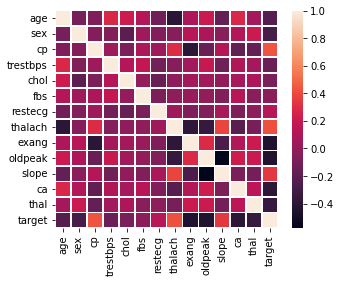

In [ ]:
corr = dfNorm.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

#Here we are using Some Helping Fuctions for predicting and visualization

In [ ]:
results_test = {}
results_train = {}
list_algos=[]

In [ ]:
def prdict_date(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [ ]:
def print_fitures(sfs_name='sfs1',verbose=0):
    a= (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose ==0:
        print('Selected features:', sfs_name.k_feature_idx_)
        for i in range (len (sfs_name.k_feature_idx_)):
            print (df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#here we create the visualization for predicted and true class

In [ ]:
def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

#Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset.
**we use it first make data easy to explore and visualize.**

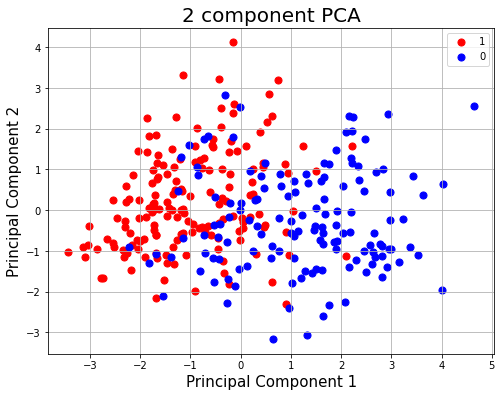

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
prdict_date(lda,X_train,y_train,X_test,y_test)

acc train: 85.38
acc test: 80.22


### RANDOM FOREST

In [ ]:

# Train: Random Forest
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
prdict_date(random_forest,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 84.62


#Here we plot te graph for feature_importance

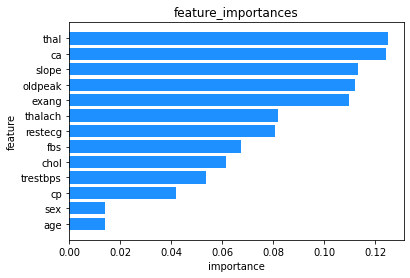

In [ ]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = df.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

#getting  all histograms with its results

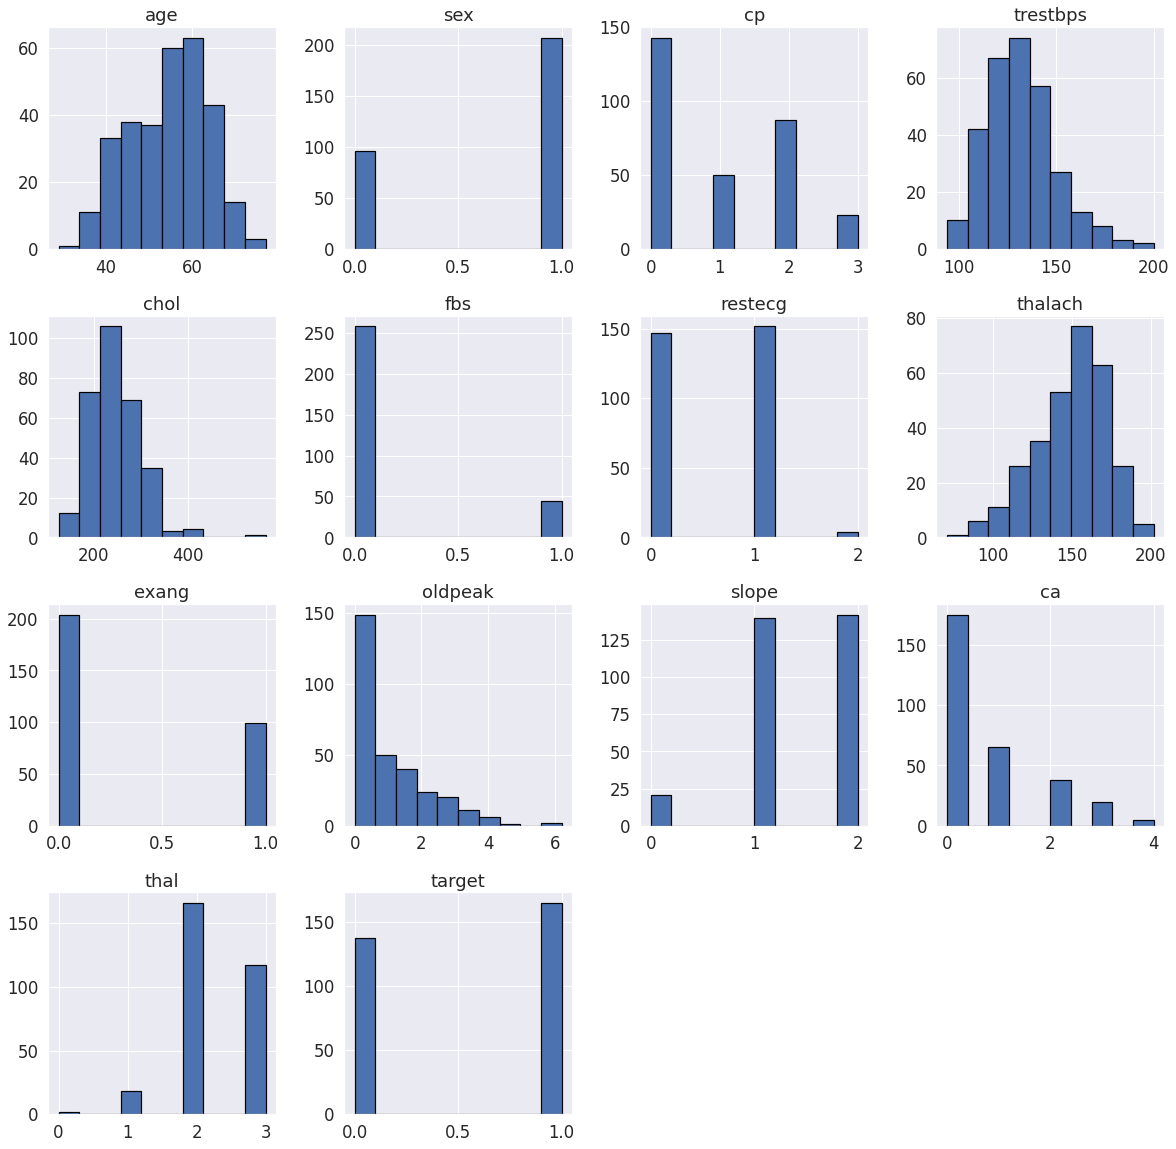

In [ ]:
sns.set(font_scale=1.5)
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

#Histogram for Age only

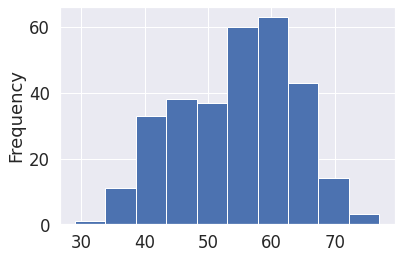

In [ ]:
df['age'].plot.hist()

# Visualization for Chest Pain 

In [ ]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

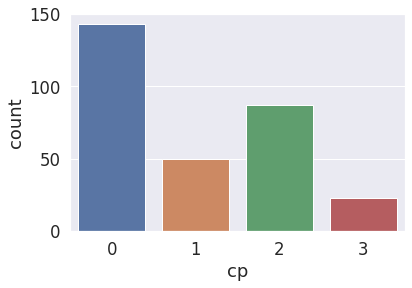

In [ ]:
# "cp:chest pain" - 4 types counts
sns.countplot(x="cp",data=df)

#Chest pain catagorization in male and Female

In [ ]:
df["sex"].value_counts()
# 1 - Male , 0 - Female

1    207
0     96
Name: sex, dtype: int64

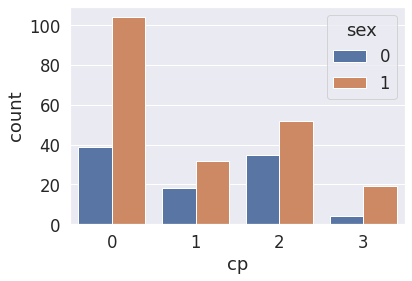

In [ ]:
# "cp:chest pain" - 4 types counts as per "sex(1-male, 0-Female)"
sns.countplot(x="cp", hue="sex",data=df)

#Prediction chart as per age

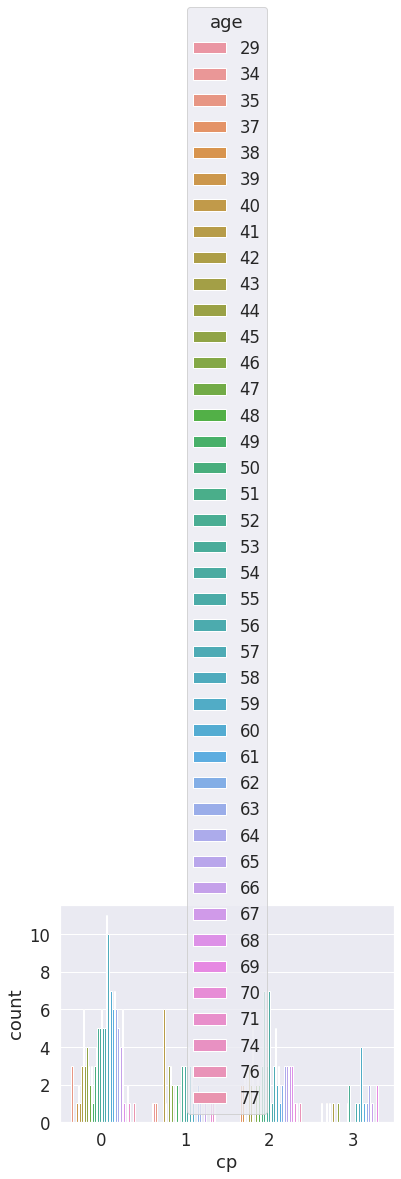

In [ ]:

# "cp:chest pain" - 4 types counts as per "age"
sns.countplot(x="cp", hue="age",data=df)

#Data Cleaning for Structure Dataset

In [ ]:
# check if any dataset contain missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       2
oldpeak     1
slope       3
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.shape

(297, 14)

#Value counts in columns

In [ ]:
df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
56    11
44    10
41    10
64    10
63     9
67     9
43     8
45     8
55     8
42     8
53     8
50     7
66     7
61     7
46     7
48     7
65     6
49     5
47     4
70     4
39     4
68     4
35     4
40     3
38     3
71     3
37     2
69     2
34     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [ ]:
df["fbs"].value_counts()

0    253
1     44
Name: fbs, dtype: int64

In [ ]:
df["target"].value_counts()

1    159
0    138
Name: target, dtype: int64

#Dummy values to convert categorial value using pandas

In [ ]:
df = pd.get_dummies(df,columns= ["cp","restecg"])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0.0,2.3,0.0,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,187,0.0,3.5,0.0,0,2,1,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0.0,1.4,2.0,0,2,1,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0.0,0.8,2.0,0,2,1,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1.0,0.6,2.0,0,2,1,1,0,0,0,0,1,0


#here we are using categorials aggregated into groups rather than being in numeric format

In [ ]:
data_numericals = ["age","sex","trestbps","chol","thalach","oldpeak"]
categorials = list(set(df.columns)- set(data_numericals) -{"target"})
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0.0,2.3,0.0,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,187,0.0,3.5,0.0,0,2,1,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0.0,1.4,2.0,0,2,1,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0.0,0.8,2.0,0,2,1,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1.0,0.6,2.0,0,2,1,1,0,0,0,0,1,0


In [ ]:
categorials


['restecg_1',
 'restecg_2',
 'exang',
 'cp_3',
 'cp_2',
 'slope',
 'cp_1',
 'cp_0',
 'thal',
 'fbs',
 'ca',
 'restecg_0']

In [ ]:
data_numericals

['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Splitting Data into features and target

In [ ]:
#droping operation performed
x = df.drop(columns='target',axis=1)
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [ ]:
len(x_train)

237

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(237, 18) (60, 18) (237,) (60,)


#Here we import the KNeighborsClassifier for represents the k nearest neighbors, where k is an integer value specified by the user

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbour = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)

In [ ]:
x_preaditon = neighbour.predict(x_test)
prediction = pd.DataFrame(x_preaditon)
prediction.head()

,0
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.65

#Using SVM Algorithm (Support Vector Machine )is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

In [ ]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [ ]:
#Predict
y_preaditon = classifier.predict(x_test)
prediction2 = pd.DataFrame(y_preaditon)
prediction2.head()

,0
0,1
1,1
2,1
3,1
4,0


In [ ]:
#Now check the Accuracy
metrics.accuracy_score(y_test, prediction2)

0.6333333333333333

In [ ]:
#Importing confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[25,  8],
       [13, 14]])

In [ ]:
confusion_matrix(y_test,prediction2)

array([[15, 18],
       [ 4, 23]])

 **Decision Tree Classifier, repetitively divides the working area (plot) into sub part by identifying lines**

In [ ]:
#Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
HeartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
HeartTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#Here we got Final predictions

In [ ]:
y_preaditon = HeartTree.predict(x_test)
prediction3 = pd.DataFrame(y_preaditon)
prediction3.head()

,0
0,1
1,1
2,0
3,0
4,0


In [ ]:
metrics.accuracy_score(y_test,prediction3)

0.6333333333333333

In [ ]:
confusion_matrix(y_test,prediction3)

array([[21, 12],
       [10, 17]])